 # ⏳ Data Handling

## Libraries Importing

In [9]:
import nltk
import pandas as pd
import numpy as np
import re
import os
import nltk
from sklearn.svm import SVC
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import issparse
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV



## Loading Data and Merging

In [11]:
# Load dataset from Kaggle's input directory
train_data = pd.read_csv("/kaggle/input/email-classification-nlp/SMS_test.csv", encoding='latin1')
test_data = pd.read_csv("/kaggle/input/email-classification-nlp/SMS_train.csv", encoding='latin1')

# Optionally preview the data
train_data.head()
test_data.head()


,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [12]:
# Concatenate the DataFrames
merged_data = pd.concat([train_data, test_data], ignore_index=True)

In [13]:
merged_data.head()

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam


## Preprocessing

In [14]:
# Preprocessing
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    # Lowercasing
    text = text.lower()
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stopwords_list = set(nltk.corpus.stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stopwords_list]
    # Join tokens back into string
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

In [15]:
# Apply preprocessing to train and test data
print(merged_data.columns)
merged_data['Message_body'] = merged_data['Message_body'].apply(preprocess_text)
merged_data.head()


Index(['S. No.', 'Message_body', 'Label'], dtype='object')


,S. No.,Message_body,Label
0,1,upgrdcentre orange customer may claim free cam...,Spam
1,2,loan purpose homeowners tenants welcome previo...,Spam
2,3,congrats nokia video camera phone call calls c...,Spam
3,4,urgent mobile number awarded prize guaranteed ...,Spam
4,5,someone contacted dating service entered phone...,Spam


## Splitting into Train and Test with Random Sample

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
train_data, test_data = train_test_split(merged_data, test_size=0.20, random_state=10)


## Vectorization

In [17]:
# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train = vectorizer.fit_transform(train_data['Message_body'])
y_train = train_data['Label']

# Transform the testing data
X_test = vectorizer.transform(test_data['Message_body'])
y_test = test_data['Label']


### Train Set Labels Plot

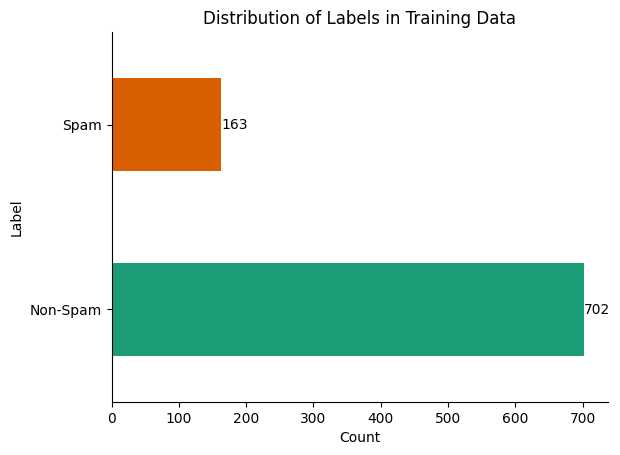

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the bar chart
ax = train_data.groupby('Label').size().plot(kind='barh', color=sns.color_palette('Dark2'))

# Setting the labels and title
plt.xlabel('Count')
plt.ylabel('Label')
plt.title('Distribution of Labels in Training Data')

# Customize the plot's appearance
plt.gca().spines[['top', 'right']].set_visible(False)

# Adding value labels to the bars
for i in ax.containers:
    ax.bar_label(i)

# Display the plot
plt.show()


### Test Set Labels Plot

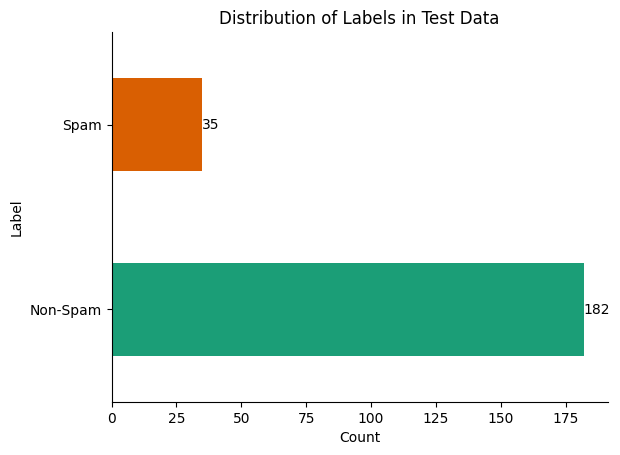

In [19]:
# Plotting the bar chart
ax = test_data.groupby('Label').size().plot(kind='barh', color=sns.color_palette('Dark2'))

# Setting the labels and title
plt.xlabel('Count')
plt.ylabel('Label')
plt.title('Distribution of Labels in Test Data')

# Customize the plot's appearance
plt.gca().spines[['top', 'right']].set_visible(False)

# Adding value labels to the bars
for container in ax.containers:
    ax.bar_label(container)

# Display the plot
plt.show()


# 👨‍💻 Machine Learning Classification Models

Model: SVM
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Mean Cross-Validation Score: 0.9618
Test Accuracy: 0.9816

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       182
           1       1.00      0.89      0.94        35

    accuracy                           0.98       217
   macro avg       0.99      0.94      0.96       217
weighted avg       0.98      0.98      0.98       217



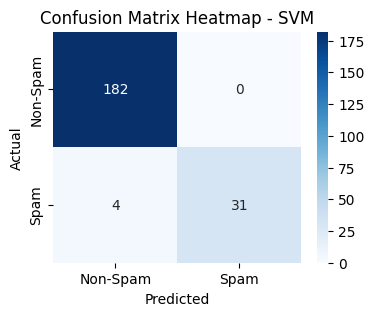

Model: Logistic Regression
Best Parameters: {'C': 100}
Mean Cross-Validation Score: 0.9572
Test Accuracy: 0.9724

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       182
           1       1.00      0.83      0.91        35

    accuracy                           0.97       217
   macro avg       0.98      0.91      0.95       217
weighted avg       0.97      0.97      0.97       217



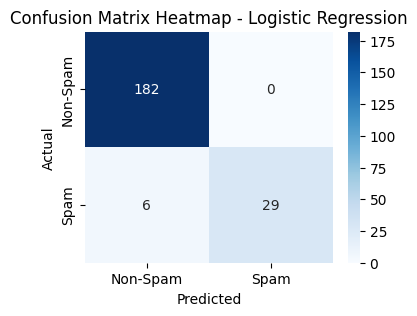

Model: Multinomial NB
Best Parameters: {'alpha': 0.1}
Mean Cross-Validation Score: 0.9618
Test Accuracy: 0.9770

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       182
           1       0.97      0.89      0.93        35

    accuracy                           0.98       217
   macro avg       0.97      0.94      0.96       217
weighted avg       0.98      0.98      0.98       217



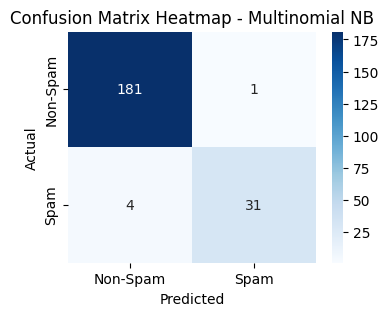

Model: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Mean Cross-Validation Score: 0.9642
Test Accuracy: 0.9631

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       182
           1       1.00      0.77      0.87        35

    accuracy                           0.96       217
   macro avg       0.98      0.89      0.92       217
weighted avg       0.96      0.96      0.96       217



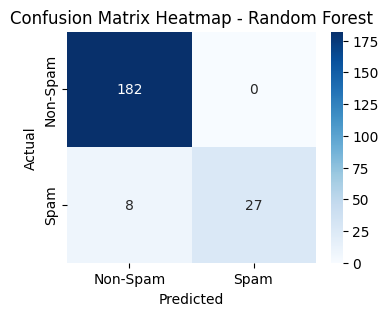

Model: Gradient Boosting
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 500}
Mean Cross-Validation Score: 0.9572
Test Accuracy: 0.9585

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       182
           1       1.00      0.74      0.85        35

    accuracy                           0.96       217
   macro avg       0.98      0.87      0.91       217
weighted avg       0.96      0.96      0.96       217



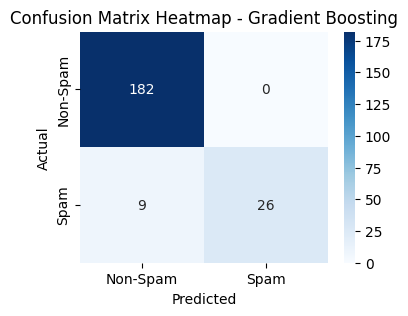

Model: LightGBM
Best Parameters: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100}
Mean Cross-Validation Score: 0.9410
Test Accuracy: 0.9539

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       182
           1       0.96      0.74      0.84        35

    accuracy                           0.95       217
   macro avg       0.96      0.87      0.91       217
weighted avg       0.95      0.95      0.95       217



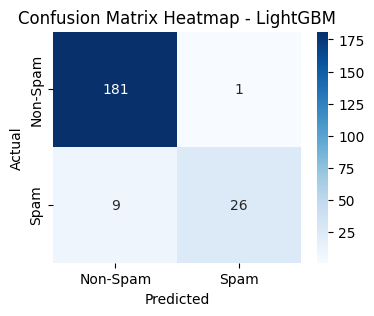


Best Model: SVM with Test Accuracy: 0.9816


In [22]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder


# Suppress warnings
warnings.filterwarnings('ignore')

# Encode target labels as numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Models and their hyperparameter grids
models = {
    'SVM': {
        'model': SVC(),
        'params': {
            'kernel': ['linear'],
            'C': [10, 100, 200],
            'gamma': ['scale']
        }
      },
      'Logistic Regression': {
          'model': LogisticRegression(max_iter=1000),
          'params': {
              'C': [0.01, 0.1, 1, 10, 100]
          }
      },'Multinomial NB': {
      'model': MultinomialNB(),
      'params': {
          'alpha': [0.01, 0.1, 1, 10]
      }
      },
      'Random Forest': {
          'model': RandomForestClassifier(),
          'params': {
              'n_estimators': [50, 100, 200, 500],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10]
          }
      },
      'Gradient Boosting': {
          'model': GradientBoostingClassifier(),
          'params': {
              'n_estimators': [50, 100, 200, 500],
              'learning_rate': [0.01, 0.1, 0.2, 0.5],
              'max_depth': [3, 5, 7, 9]
          }
      },
        'LightGBM': {
            'model': LGBMClassifier(verbose=-1),
            'params': {
                'n_estimators': [50, 100, 200, 500],
                'learning_rate': [0.01, 0.1, 0.2, 0.5],
                'max_depth': [-1, 5, 10, 20]
            }
      }
}

def evaluate_model(model, param_grid, X_train, y_train, X_test, y_test, cv_splits=5):
    # Perform Grid Search with Cross-Validation
    grid_search = GridSearchCV(model, param_grid, cv=cv_splits, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    # Mean cross-validation score
    mean_cv_score = grid_search.best_score_

    # Train the best model on the entire training dataset
    best_model.fit(X_train, y_train)

    # Predictions on the test dataset
    y_pred = best_model.predict(X_test)

    # Evaluate the model on the test dataset
    test_accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return mean_cv_score, test_accuracy, class_report, conf_matrix, grid_search.best_params_

# Assuming X_train, y_train, X_test, and y_test are already defined and preprocessed
# Evaluate all models
results = {}

for model_name, model_info in models.items():
    mean_cv_score, test_accuracy, class_report, conf_matrix, best_params = evaluate_model(
        model_info['model'], model_info['params'], X_train, y_train_encoded, X_test, y_test_encoded
    )
    results[model_name] = {
        'Mean CV Score': mean_cv_score,
        'Test Accuracy': test_accuracy,
        'Classification Report': class_report,
        'Confusion Matrix': conf_matrix,
        'Best Params': best_params
    }

# Display the results and find the best model
best_model_name = None
best_test_accuracy = 0

for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Best Parameters: {result['Best Params']}")
    print(f"Mean Cross-Validation Score: {result['Mean CV Score']:.4f}")
    print(f"Test Accuracy: {result['Test Accuracy']:.4f}")
    print("\nClassification Report:")
    print(result['Classification Report'])
    plt.figure(figsize=(4, 3))
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix Heatmap - {model_name}')
    plt.show()

    if result['Test Accuracy'] > best_test_accuracy:
        best_test_accuracy = result['Test Accuracy']
        best_model_name = model_name

print(f"\nBest Model: {best_model_name} with Test Accuracy: {best_test_accuracy:.4f}")


## Rerunning only for the best parameters to be faster

Model: SVM
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Mean Cross-Validation Score: 0.9618
Test Accuracy: 0.9816

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       182
           1       1.00      0.89      0.94        35

    accuracy                           0.98       217
   macro avg       0.99      0.94      0.96       217
weighted avg       0.98      0.98      0.98       217



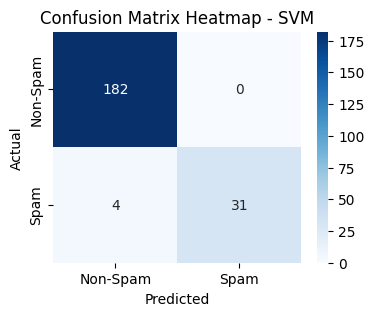

Model: Logistic Regression
Best Parameters: {'C': 100}
Mean Cross-Validation Score: 0.9572
Test Accuracy: 0.9724

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       182
           1       1.00      0.83      0.91        35

    accuracy                           0.97       217
   macro avg       0.98      0.91      0.95       217
weighted avg       0.97      0.97      0.97       217



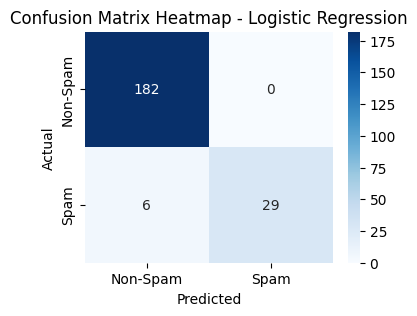

Model: Multinomial NB
Best Parameters: {'alpha': 0.01}
Mean Cross-Validation Score: 0.9434
Test Accuracy: 0.9770

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       182
           1       0.97      0.89      0.93        35

    accuracy                           0.98       217
   macro avg       0.97      0.94      0.96       217
weighted avg       0.98      0.98      0.98       217



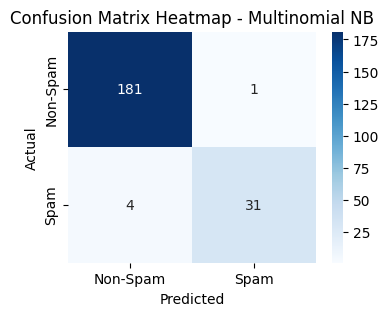

Model: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Mean Cross-Validation Score: 0.9607
Test Accuracy: 0.9585

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       182
           1       1.00      0.74      0.85        35

    accuracy                           0.96       217
   macro avg       0.98      0.87      0.91       217
weighted avg       0.96      0.96      0.96       217



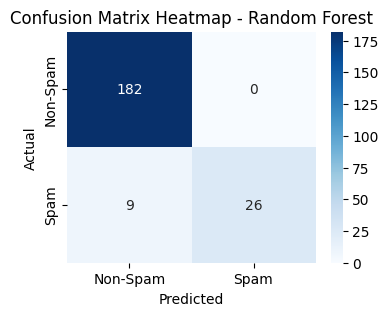

Model: Gradient Boosting
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Mean Cross-Validation Score: 0.9445
Test Accuracy: 0.9585

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       182
           1       1.00      0.74      0.85        35

    accuracy                           0.96       217
   macro avg       0.98      0.87      0.91       217
weighted avg       0.96      0.96      0.96       217



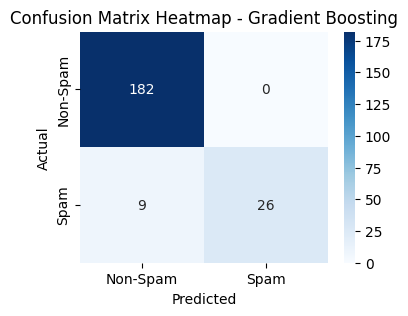

Model: LightGBM
Best Parameters: {'learning_rate': 0.01, 'max_depth': -1, 'n_estimators': 500}
Mean Cross-Validation Score: 0.9376
Test Accuracy: 0.9585

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       182
           1       0.96      0.77      0.86        35

    accuracy                           0.96       217
   macro avg       0.96      0.88      0.92       217
weighted avg       0.96      0.96      0.96       217



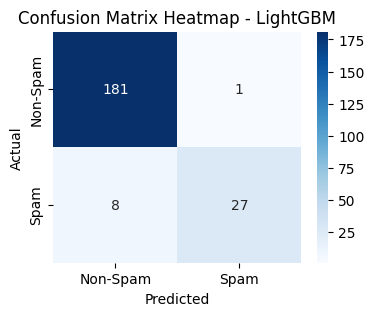


Best Model: SVM with Test Accuracy: 0.9816


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder

# Encode target labels as numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Models and their hyperparameter grids
models = {
    'SVM': {
        'model': SVC(),
        'params': {
            'kernel': ['linear'],
            'C': [10],
            'gamma': ['scale']
        }
      },
      'Logistic Regression': {
          'model': LogisticRegression(max_iter=1000),
          'params': {
              'C': [100]
          }
      },'Multinomial NB': {
      'model': MultinomialNB(),
      'params': {
          'alpha': [0.01]
      }
      },
      'Random Forest': {
          'model': RandomForestClassifier(),
          'params': {
              'n_estimators': [200],
              'max_depth': [None],
              'min_samples_split': [5]
          }
      },
      'Gradient Boosting': {
          'model': GradientBoostingClassifier(),
          'params': {
              'n_estimators': [100],
              'learning_rate': [0.2],
              'max_depth': [5]
          }
      },
        'LightGBM': {
            'model': LGBMClassifier(verbose=-1),
            'params': {
                'n_estimators': [500],
                'learning_rate': [0.01],
                'max_depth': [-1]
            }
      }
}

def evaluate_model(model, param_grid, X_train, y_train, X_test, y_test, cv_splits=5):
    # Perform Grid Search with Cross-Validation
    grid_search = GridSearchCV(model, param_grid, cv=cv_splits, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    # Mean cross-validation score
    mean_cv_score = grid_search.best_score_

    # Train the best model on the entire training dataset
    best_model.fit(X_train, y_train)

    # Predictions on the test dataset
    y_pred = best_model.predict(X_test)

    # Evaluate the model on the test dataset
    test_accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return mean_cv_score, test_accuracy, class_report, conf_matrix, grid_search.best_params_

# Assuming X_train, y_train, X_test, and y_test are already defined and preprocessed
# Evaluate all models
results = {}

for model_name, model_info in models.items():
    mean_cv_score, test_accuracy, class_report, conf_matrix, best_params = evaluate_model(
        model_info['model'], model_info['params'], X_train, y_train_encoded, X_test, y_test_encoded
    )
    results[model_name] = {
        'Mean CV Score': mean_cv_score,
        'Test Accuracy': test_accuracy,
        'Classification Report': class_report,
        'Confusion Matrix': conf_matrix,
        'Best Params': best_params
    }

# Display the results and find the best model
best_model_name = None
best_test_accuracy = 0

for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Best Parameters: {result['Best Params']}")
    print(f"Mean Cross-Validation Score: {result['Mean CV Score']:.4f}")
    print(f"Test Accuracy: {result['Test Accuracy']:.4f}")
    print("\nClassification Report:")
    print(result['Classification Report'])
    plt.figure(figsize=(4, 3))
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix Heatmap - {model_name}')
    plt.show()

    if result['Test Accuracy'] > best_test_accuracy:
        best_test_accuracy = result['Test Accuracy']
        best_model_name = model_name

print(f"\nBest Model: {best_model_name} with Test Accuracy: {best_test_accuracy:.4f}")
